# Comprehensive Analysis of Legal Metrics:  Indictments, processes and victims
Por Alfonso Cervantes Barragán   
Data Scientist

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Abstract**

This report provides a comprehensive exploratory data analysis (EDA) of legal metrics related to indictments, processes, and victims over a series of years across various municipalities. Utilizing a robust dataset, the analysis uncovers pivotal trends, identifies outliers, and examines the interrelationships between different legal variables to better understand regional disparities and temporal fluctuations. 

**Dataset description**

The dataset is now properly loaded with the following columns:

    AÑO: The year of the data record.  
    MPO: The municipality or city.  
    TOTAL_INDICIADOS: The total number of indicted individuals.  
    TOTAL_PROCESOS: The total number of processes.  
    TOTAL_VÍCTIMAS: The total number of victims.  
    trim: The quarter of the year.

Source of the datasets: https://www.datos.gov.co/Justicia-y-Derecho/Conteo-de-Indiciados-V2/y2i3-im6h/about_data

The data were previously processed and converted to the actual format. 

**Loading the data**

In [47]:
# Load the uploaded dataset to examine its structure and contents
file_path = 'Fiscalia.csv'
data = pd.read_csv(file_path,sep=";",decimal=",")

# Display the first few rows and the general information of the dataset
data.head()



,AÑO,MPO,TOTAL_INDICIADOS,TOTAL_PROCESOS,TOTAL_VÍCTIMAS,trim
0,2010,bogota,98563.5,69821.4,8232.5,1
1,2010,bucaramanga,10200.0,6537.3,944.2,1
2,2010,cali,23406.0,17923.8,3947.5,1
3,2010,medellin,32243.5,24949.5,5822.8,1
4,2010,pasto,6358.0,4504.5,1847.2,1


## EXPLORATORY DATA ANALYSIS

**Descriptive Statistics:**  


In [49]:
# Calculate descriptive statistics
data.describe()



,AÑO,TOTAL_INDICIADOS,TOTAL_PROCESOS,TOTAL_VÍCTIMAS,trim
count,280.000000,280.000000,280.000000,280.000000,280.000000
mean,2016.500000,18406.110714,25579.775000,18944.546429,2.500000
std,4.038347,23463.706426,31460.265794,25002.787662,1.120036
min,2010.000000,1173.000000,1465.200000,944.200000,1.000000
25%,2013.000000,4435.600000,6383.400000,4867.275000,1.750000
50%,2016.500000,10057.750000,12248.600000,9883.100000,2.500000
75%,2020.000000,22662.100000,29988.750000,23296.475000,3.250000
max,2023.000000,117168.500000,172171.200000,166891.600000,4.000000


**Conclusions** 

1. **Central Tendency and Dispersion**:
   - **Mean Values**: The average counts for indictments, processes, and victims are 18,406, 25,580, and 18,945 respectively. This indicates that, on average, the number of processes is higher than both indictments and victims across the years.
   - **Standard Deviation**: High standard deviations for all three metrics (23,464 for indictments, 31,460 for processes, and 25,003 for victims) suggest a wide variability in the data, indicating significant fluctuations from year to year or across different trimesters.

2. **Range and Quartiles**:
   - **Minimum Values**: The minimum values for indictments, processes, and victims are considerably low (1,173; 1,465; and 944 respectively), which could point to very low activity or data collection starting mid-year for some regions or years.
   - **Quartiles**:
     - The **25th percentile** shows that a quarter of the observations fall below 4,436 for indictments, 6,383 for processes, and 4,867 for victims, suggesting that lower activity levels are not uncommon.
     - The **median (50th percentile)** values are 10,058 for indictments, 12,249 for processes, and 9,883 for victims, which are considerably lower than the averages, indicating a right-skewed distribution where a few high values are pulling the mean upwards.
     - The **75th percentile** values show that three-quarters of the data fall below 22,662 for indictments, 29,989 for processes, and 23,296 for victims, further highlighting the presence of very high values (outliers) in the upper quartile.

3. **Maximum Values**: The maximum counts recorded (117,169 for indictments, 172,171 for processes, and 166,892 for victims) are dramatically higher than most of the data points, signifying the presence of extreme values or unusual spikes during certain periods.

4. **Data Distribution**:
   - The significant difference between the mean and median values and the high standard deviation suggest that the distribution of data for indictments, processes, and victims is not symmetrical but rather skewed to the right. This skewness is typically characterized by a few years or trimesters having unusually high numbers.



**Visualization of temporal trend**

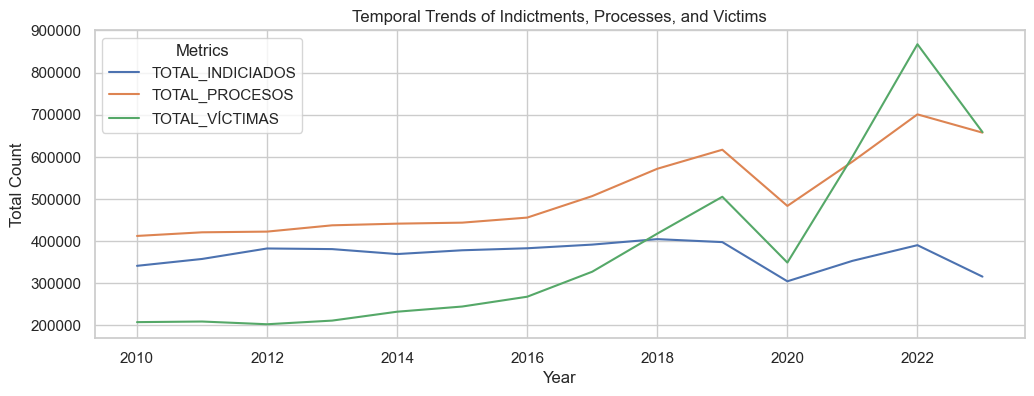

In [50]:
# Plot temporal trends
fig, ax = plt.subplots(figsize=(12, 4))
data.groupby('AÑO')[['TOTAL_INDICIADOS', 'TOTAL_PROCESOS', 'TOTAL_VÍCTIMAS']].sum().plot(ax=ax)
ax.set_title('Temporal Trends of Indictments, Processes, and Victims')
ax.set_ylabel('Total Count')
ax.set_xlabel('Year')

plt.legend(title='Metrics')
plt.grid(True)
plt.show()


**Conclusions**  

1. **Increasing Trends for Processes and Victims**: Both the total number of processes (Total Procesos) and the total number of victims (Total Víctimas) show an upward trend over the period. Notably, the number of victims saw a significant increase around 2018, surpassing the number of processes shortly thereafter.

2. **Decline in Indictments**: The count of indictments (Total Indiciados) has generally trended downwards since a peak in 2012, indicating a possible decrease in the number of individuals formally charged over the years.

3. **Sharp Fluctuations in Recent Years**: Around 2020, all three metrics exhibit sharp fluctuations. This might correlate with external factors such as changes in law enforcement policies, judicial reforms, or socio-economic disruptions (e.g., impacts due to the COVID-19 pandemic).

4. **Disparity Between Trends**: The disparity between the trends of indictments and the other two metrics (processes and victims) becomes quite pronounced, especially post-2018. While the number of victims and processes increased, indictments decreased, suggesting possible changes in the judicial processing or reporting mechanisms.

5. **Peak and Sharp Decline in 2022**: There is a notable peak in 2022 for both processes and victims, followed by a sharp decline. This spike could be due to specific events or changes in the legal system that year, requiring further investigation to understand its causes.


**Geographical Distribution**   
The objective is to visualize the average values of TOTAL_INDICIADOS, TOTAL_PROCESOS, and TOTAL_VÍCTIMAS for each municipality to identify areas with higher incidences. This geographic distribution can help in understanding the regional disparities in legal indictments, processes, and victim counts, which might reflect population density, regional enforcement differences, or socio-economic factors.

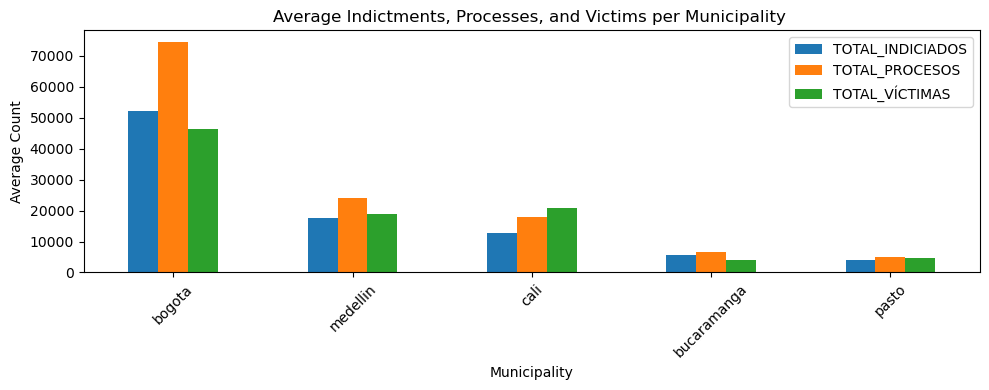

In [25]:
# Group data by municipality and calculate average values for key metrics
geo_distribution = data.groupby('MPO')[['TOTAL_INDICIADOS', 'TOTAL_PROCESOS', 'TOTAL_VÍCTIMAS']].mean().sort_values(by='TOTAL_INDICIADOS', ascending=False)

# Plotting the geographical distribution
fig, ax = plt.subplots(figsize=(10, 4))

geo_distribution.plot(kind='bar', ax=ax)  
ax.set_title('Average Indictments, Processes, and Victims per Municipality ')
ax.set_ylabel('Average Count')
ax.set_xlabel('Municipality')
plt.xticks(rotation=45)
plt.tight_layout()



plt.show()


**Conclusions** 

1. **Higher Activity in Larger Cities**: Bogotá shows significantly higher numbers across all three categories—indictments, processes, and victims—compared to other municipalities. This suggests that Bogotá, likely due to its larger population and urban complexity, experiences more judicial activities.

2. **Comparative Analysis Between Cities**:
   - **Medellín** follows Bogotá but with lower averages in all categories, still standing out compared to smaller cities like Cali, Bucaramanga, and Pasto.
   
3. **Lower Numbers in Smaller Municipalities**:
   - **Bucaramanga** and **Pasto** have notably lower counts in all categories. The data suggests that these smaller municipalities deal with far fewer cases, which might be due to smaller populations or possibly different local governance and law enforcement efficiencies.

4. **General Trend**:
   - Across all municipalities, the number of indictments is consistently lower than the number of processes, which might suggest that once cases are opened, additional charges or related cases (processes) tend to accumulate, amplifying the judicial activity beyond the initial indictments.



**Create correlation analysis**   
In order to understand the strength and direction of the relationship between indictments, processes and victims, 
the correlation matrix will be calculated. 

In [26]:
# Create correlation matrix
correlation_matrix = data[['TOTAL_INDICIADOS', 'TOTAL_PROCESOS', 'TOTAL_VÍCTIMAS']].corr()


**Visualization of the correlation matrix**

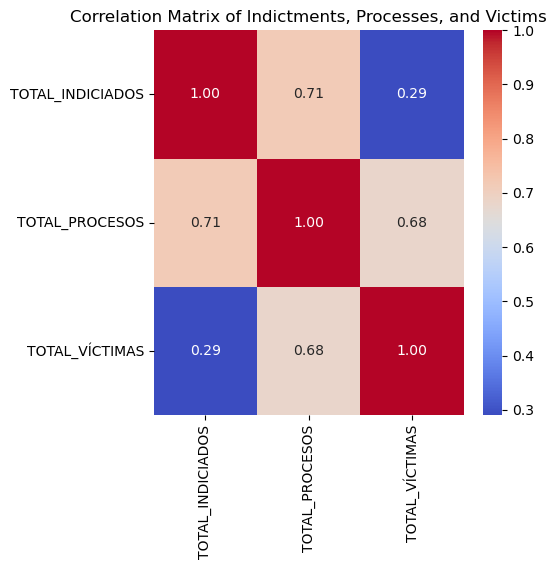

In [29]:
# Displaying the correlation matrix
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Indictments, Processes, and Victims')
plt.show()


**Conclusions** 


1. **Strong Relationship Between Indictments and Processes**: There is a strong correlation (0.71) between the number of indictments (Total Indiciados) and processes (Total Procesos). This suggests that increases in the number of people indicted typically correspond to increases in the number of judicial processes. This is expected as more indictments usually lead to more cases being processed in the judicial system.

2. **Moderate Relationship Between Processes and Victims**: The correlation between processes (Total Procesos) and victims (Total Víctimas) is moderately strong (0.68), indicating that as the number of processes increases, the number of victims involved in these processes tends to increase as well. This could reflect cases with multiple charges or victims linked to a single or multiple defendants.

3. **Weak Relationship Between Indictments and Victims**: There is a relatively weak correlation (0.29) between the number of indictments and the number of victims. This low correlation suggests that the number of people indicted doesn't necessarily move in tandem with the number of victims identified in these cases, which might indicate that many legal actions involve non-victim-related crimes or that a single case with many victims can result in only a few indictments.



**Outlier Detection**

the Interquartile Range (IQR) method will be used to identify outliers in the data for each metric
(TOTAL_INDICIADOS, TOTAL_PROCESOS, TOTAL_VÍCTIMAS) across years.


**The Interquartile range (IQR) method:**

The interquartile range (IQR) is a statistical method used to measure the spread of data points around the median, effectively capturing the middle 50% of the data. It's calculated by subtracting the first quartile (Q1), which represents the 25th percentile of the data, from the third quartile (Q3), which represents the 75th percentile.  

The IQR is useful for identifying outliers and understanding the variability of data without being affected by extreme values, making it a more robust measure of spread than the standard deviation in some cases.

In [43]:
# Function to detect outliers using IQR
def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers[[feature,"trim","AÑO"]], lower_bound, upper_bound

# Applying the outlier detection for each metric
outliers_indictments, lb_indictments, ub_indictments = detect_outliers(data, 'TOTAL_INDICIADOS')
outliers_processes, lb_processes, ub_processes = detect_outliers(data, 'TOTAL_PROCESOS')
outliers_victims, lb_victims, ub_victims = detect_outliers(data, 'TOTAL_VÍCTIMAS')

# Displaying the outliers
outliers_indictments, outliers_processes, outliers_victims


(    TOTAL_INDICIADOS  trim   AÑO
 0            98563.5     1  2010
 5           100208.5     1  2011
 10          110604.0     1  2012
 15          104511.0     1  2013
 20          102222.0     1  2014
 25          102347.0     1  2015
 30          104537.0     1  2016
 35          107550.0     1  2017
 40          114086.0     1  2018
 45          113052.0     1  2019
 50           89041.5     1  2020
 55           98949.0     1  2021
 60          117168.5     1  2022
 65           99622.0     1  2023,
      TOTAL_PROCESOS  trim   AÑO
 0           69821.4     1  2010
 5           67319.7     1  2011
 10          67839.3     1  2012
 15          70337.7     1  2013
 20          72190.8     1  2014
 25          73460.1     1  2015
 30          75814.5     1  2016
 35          87949.2     1  2017
 40         103428.9     1  2018
 45         111855.6     1  2019
 50          89247.0     1  2020
 55         108332.4     1  2021
 60         129128.4     1  2022
 65         124299.0     1 

**Conclusions** 

1. **High Variation in Data**: There are considerable fluctuations in the numbers across different periods (trimesters), showing that at certain times, the counts of indictments, processes, or victims spike significantly. These spikes are considered outliers because they are much higher than typical data points.

2. **Specific High Activity Periods**: The data reveals specific trimesters where the counts of indictments, processes, and victims are particularly high. For instance:
   - In the first trimester, we see extremely high numbers for indictments, suggesting a period of intense legal activity.
   - For processes, trimesters 1 and 3 show exceptionally high values, indicating significant judicial processing during these times.
   - Victims' numbers are notably high in trimester 3, pointing towards a large number of victim-related cases being processed or reported.



**Visualizing with outliers**

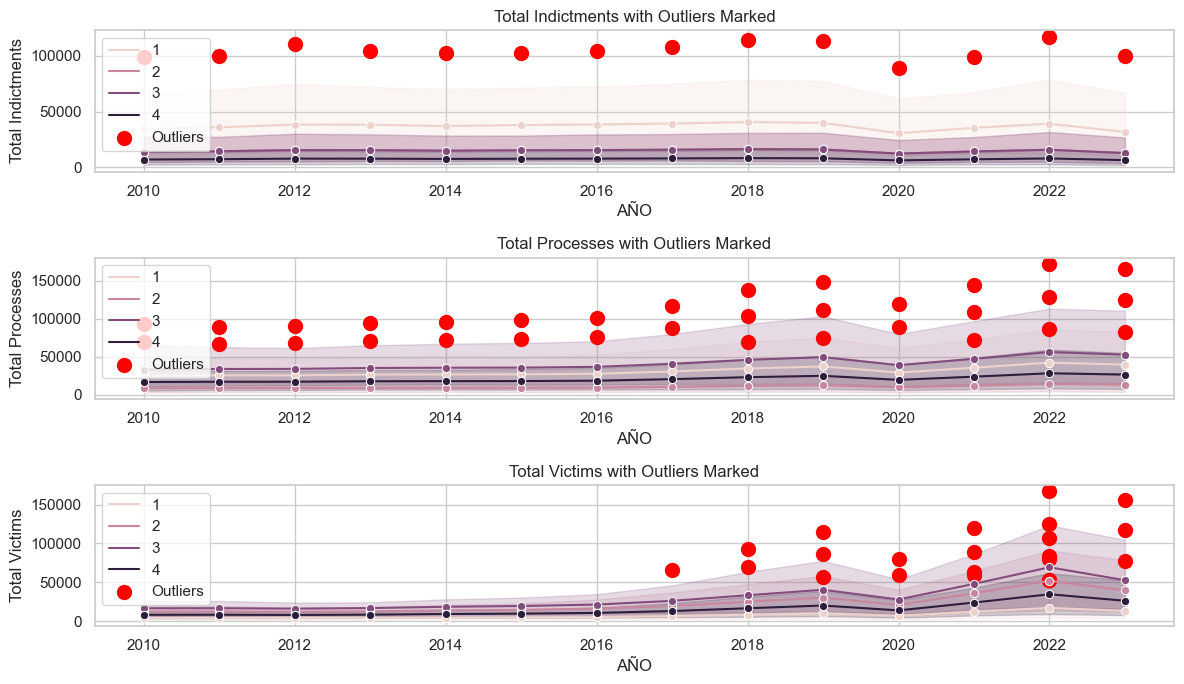

In [46]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 7))

# Plotting Total Indictments over the years with outliers
sns.lineplot(data=data, x='AÑO', y='TOTAL_INDICIADOS', hue='trim', marker='o', ax=axes[0])
axes[0].scatter(outliers_indictments['AÑO'], outliers_indictments['TOTAL_INDICIADOS'], color='red', s=100, label='Outliers')
axes[0].set_title('Total Indictments with Outliers Marked')
axes[0].set_ylabel('Total Indictments')
axes[0].legend()

# Plotting Total Processes over the years with outliers
sns.lineplot(data=data, x='AÑO', y='TOTAL_PROCESOS', hue='trim', marker='o', ax=axes[1])
axes[1].scatter(outliers_processes['AÑO'], outliers_processes['TOTAL_PROCESOS'], color='red', s=100, label='Outliers')
axes[1].set_title('Total Processes with Outliers Marked')
axes[1].set_ylabel('Total Processes')
axes[1].legend()

# Plotting Total Victims over the years with outliers
sns.lineplot(data=data, x='AÑO', y='TOTAL_VÍCTIMAS', hue='trim', marker='o', ax=axes[2])
axes[2].scatter(outliers_victims['AÑO'], outliers_victims['TOTAL_VÍCTIMAS'], color='red', s=100, label='Outliers')
axes[2].set_title('Total Victims with Outliers Marked')
axes[2].set_ylabel('Total Victims')
axes[2].legend()

plt.tight_layout()
plt.show()


**Dashboard design**  
The development of an interactive dashboard seeks to improve the visibility and comprehension of essential metrics, particularly the count of indictments (accused individuals), victims, and total legal processes over time.

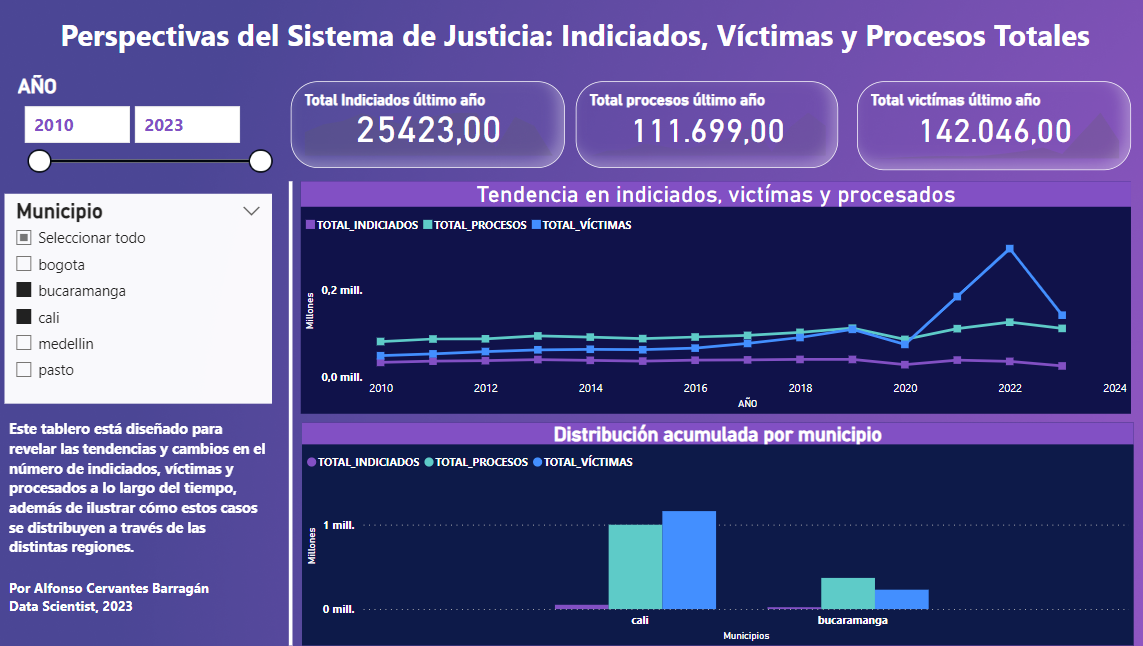